In [2]:
import os
import os.path as osp
import numpy as np
import pandas as pd
import json

In [3]:
result_root = "/labs/gevaertlab/users/yyhhli/code/vae/applications/results"

In [3]:
osp.exists(result_root)

True

In [4]:
version_dir = "VAE3D32AUG_"

In [5]:
label_names = ["StfAJCC", "StfEGFRMutation", "StfLymphInvation", "StfNStage", "StfTStage"]

In [6]:
def load_json(file_path):
    with open(file_path) as f:
        data = json.load(f)
    return data


In [7]:
data = load_json(osp.join(result_root, version_dir+"49", label_names[0]+".result_dict.json"))


In [13]:
data

{'__dict': {},
 'logistic_regression': {'Accuracy': 0.6666666666666666,
  'F1': 0.6666666666666666,
  'Precision': 0.6666666666666666,
  'Recall': 0.6666666666666666,
  'AUROC': 0.583554376657825},
 'k_nearest_neighbors': {'Accuracy': 0.7142857142857143,
  'F1': 0.6681096681096681,
  'Precision': 0.6895752895752896,
  'Recall': 0.7142857142857143,
  'AUROC': 0.5596816976127321},
 'svc': {'Accuracy': 0.6666666666666666,
  'F1': 0.5870098039215685,
  'Precision': 0.5811965811965811,
  'Recall': 0.6666666666666666,
  'AUROC': 0.5676392572944298},
 'random_forest': {'Accuracy': 0.6666666666666666,
  'F1': 0.6127946127946129,
  'Precision': 0.609009009009009,
  'Recall': 0.6666666666666666,
  'AUROC': 0.6750663129973475},
 'mlp': {'Accuracy': 0.6904761904761905,
  'F1': 0.6869087974172721,
  'Precision': 0.6841269841269841,
  'Recall': 0.6904761904761905,
  'AUROC': 0.6472148541114058}}

In [8]:
def summarize_metrics(result_dict, metric_list = ["Accuracy", "F1", "Precision", "Recall", "AUROC"]):
    metrics = {m: [] for m in metric_list}
    for k, rdict in result_dict.items():
        if k != "__dict":
            for m, v in rdict.items():
                metrics[m].append(v)
    return metrics


In [9]:
sdata = summarize_metrics(data)

In [10]:
sdata

{'Accuracy': [0.6666666666666666,
  0.7142857142857143,
  0.6666666666666666,
  0.6666666666666666,
  0.6904761904761905],
 'F1': [0.6666666666666666,
  0.6681096681096681,
  0.5870098039215685,
  0.6127946127946129,
  0.6869087974172721],
 'Precision': [0.6666666666666666,
  0.6895752895752896,
  0.5811965811965811,
  0.609009009009009,
  0.6841269841269841],
 'Recall': [0.6666666666666666,
  0.7142857142857143,
  0.6666666666666666,
  0.6666666666666666,
  0.6904761904761905],
 'AUROC': [0.583554376657825,
  0.5596816976127321,
  0.5676392572944298,
  0.6750663129973475,
  0.6472148541114058]}

In [11]:
# make a dataframe of this
# model -> average of all metrics make table
# diff table for diff tasks
label_names = ["StfAJCC", "StfEGFRMutation", "StfLymphInvasion", "StfNStage", "StfTStage"]
model_version_list = [49, 51, 53, 57, 58, 59, 60]
metric_list = ["Accuracy", "F1", "Precision", "Recall", "AUROC"]
for label in label_names:
    result = {}
    for ver in model_version_list:
        data = load_json(osp.join(result_root, version_dir+str(ver), label+".result_dict.json"))
        sdata = summarize_metrics(data)
        result["version_"+str(ver)] = [np.mean(sdata[n]) for n in sdata.keys()]
    df = pd.DataFrame(result)
    df.to_csv(f"{label}.csv", index=False)

In [12]:
df.to_csv()

',version_49,version_51,version_53,version_57,version_58,version_59,version_60\n0,0.6048780487804878,0.6195121951219512,0.5302325581395348,0.5,0.6146341463414634,0.5190476190476191,0.4975609756097561\n1,0.5942918818180143,0.6095990745877302,0.5192095535349783,0.4662200478320629,0.6122149985871472,0.5158504702852811,0.4964341717531555\n2,0.6174170860756227,0.658317289150121,0.5630266697868943,0.7063888353362038,0.6501614008026912,0.5293534060849985,0.5108306795522684\n3,0.6048780487804878,0.6195121951219512,0.5302325581395348,0.5,0.6146341463414634,0.5190476190476191,0.4975609756097561\n4,0.6253588516746411,0.705023923444976,0.49342105263157904,0.6443877551020408,0.6448529411764705,0.5306636155606407,0.5096618357487923\n'

### VISUALIZATION of downstream task results

In [13]:
import os
import os.path as osp
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt

result_root = "/labs/gevaertlab/users/yyhhli/code/vae/applications/results"
version_dir1 = "VAE3D32AUG_"
label_names = ["StfAJCC", "StfEGFRMutation", "StfLymphInvation", "StfNStage", "StfTStage"]

In [14]:
def load_json(file_path):
    with open(file_path) as f:
        data = json.load(f)
    return data

In [15]:
# graph = models 
def summarize_metrics(metric = "AUROC", task="StfAJCC", model="random_forest",
                      versions=["VAE3D32AUG_60", "VAE3D32AUG_49", "VAE3D32AUG_51", "VAE3D32AUG_53"]):
    result_root = "/labs/gevaertlab/users/yyhhli/code/vae/applications/results"
    result_dict = {}
    for ver in versions:
        data = load_json(osp.join(result_root, ver, task+".result_dict_bootstrapping.json"))
        result_dict[ver] = data[model][metric]
    return result_dict



In [16]:
result_dict = summarize_metrics()

In [17]:
result_dict

{'VAE3D32AUG_60': [0.6100478468899522,
  0.5933014354066986,
  0.6794258373205742,
  0.6531100478468899,
  0.6626794258373205,
  0.6555023923444977,
  0.5956937799043062,
  0.7033492822966507,
  0.6961722488038278,
  0.7272727272727273],
 'VAE3D32AUG_49': [0.4827586206896552,
  0.596816976127321,
  0.5676392572944298,
  0.40318302387267907,
  0.3687002652519894,
  0.5251989389920424,
  0.43766578249336874,
  0.5278514588859418,
  0.559681697612732,
  0.596816976127321],
 'VAE3D32AUG_51': [0.7025862068965518,
  0.7370689655172413,
  0.742816091954023,
  0.7931034482758621,
  0.7198275862068965,
  0.6379310344827587,
  0.7255747126436782,
  0.7916666666666665,
  0.5847701149425287,
  0.7341954022988506],
 'VAE3D32AUG_53': [0.638095238095238,
  0.6154761904761905,
  0.6547619047619048,
  0.5488095238095239,
  0.6130952380952381,
  0.569047619047619,
  0.6297619047619047,
  0.611904761904762,
  0.6416666666666667,
  0.4916666666666667]}

In [28]:
import seaborn as sns
def plot_box(data):
    plt.figure(figsize=(8, 5))
    ##### Set style options here #####
    sns.set_style("whitegrid")  # "white","dark","darkgrid","ticks"
    boxprops = dict(linestyle='-', linewidth=1.5, color='#00145A')
    flierprops = dict(marker='o', markersize=1,
                    linestyle='none')
    whiskerprops = dict(color='#00145A')
    capprops = dict(color='#00145A')
    medianprops = dict(linewidth=1.5, linestyle='-', color='#01FBEE')
    vals, names, xs = [],[],[]
    for i, col in enumerate(data.columns):
        vals.append(data[col].values)
        names.append(col)
        xs.append(np.random.normal(i + 1, 0.04, data[col].values.shape[0]))  
    # adds jitter to the data points - can be adjusted
    plt.boxplot(data, labels=data.columns, notch=False, 
                boxprops=boxprops, whiskerprops=whiskerprops,
                capprops=capprops, flierprops=flierprops, 
                medianprops=medianprops,showmeans=False) 
    palette = ['#FF2709', '#09FF10', '#0030D7', '#FA70B5', "#80ADBC", "#CAB08B", "#463333", "#797a7e"]
    for x, val, c in zip(xs, vals, palette[:len(vals)]):
        plt.scatter(x, val, alpha=0.4, color=c)
    plt.show()

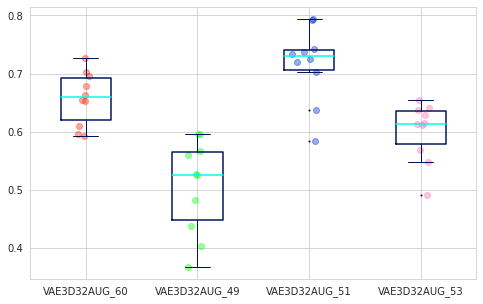

In [29]:
plot_box(pd.DataFrame(result_dict))